   
           1. With Ordered Dict === > Easy(GeeksForGeeks) & Medium(Leetcode)
   
           2. Without Ordered Dict ===> Expert
   

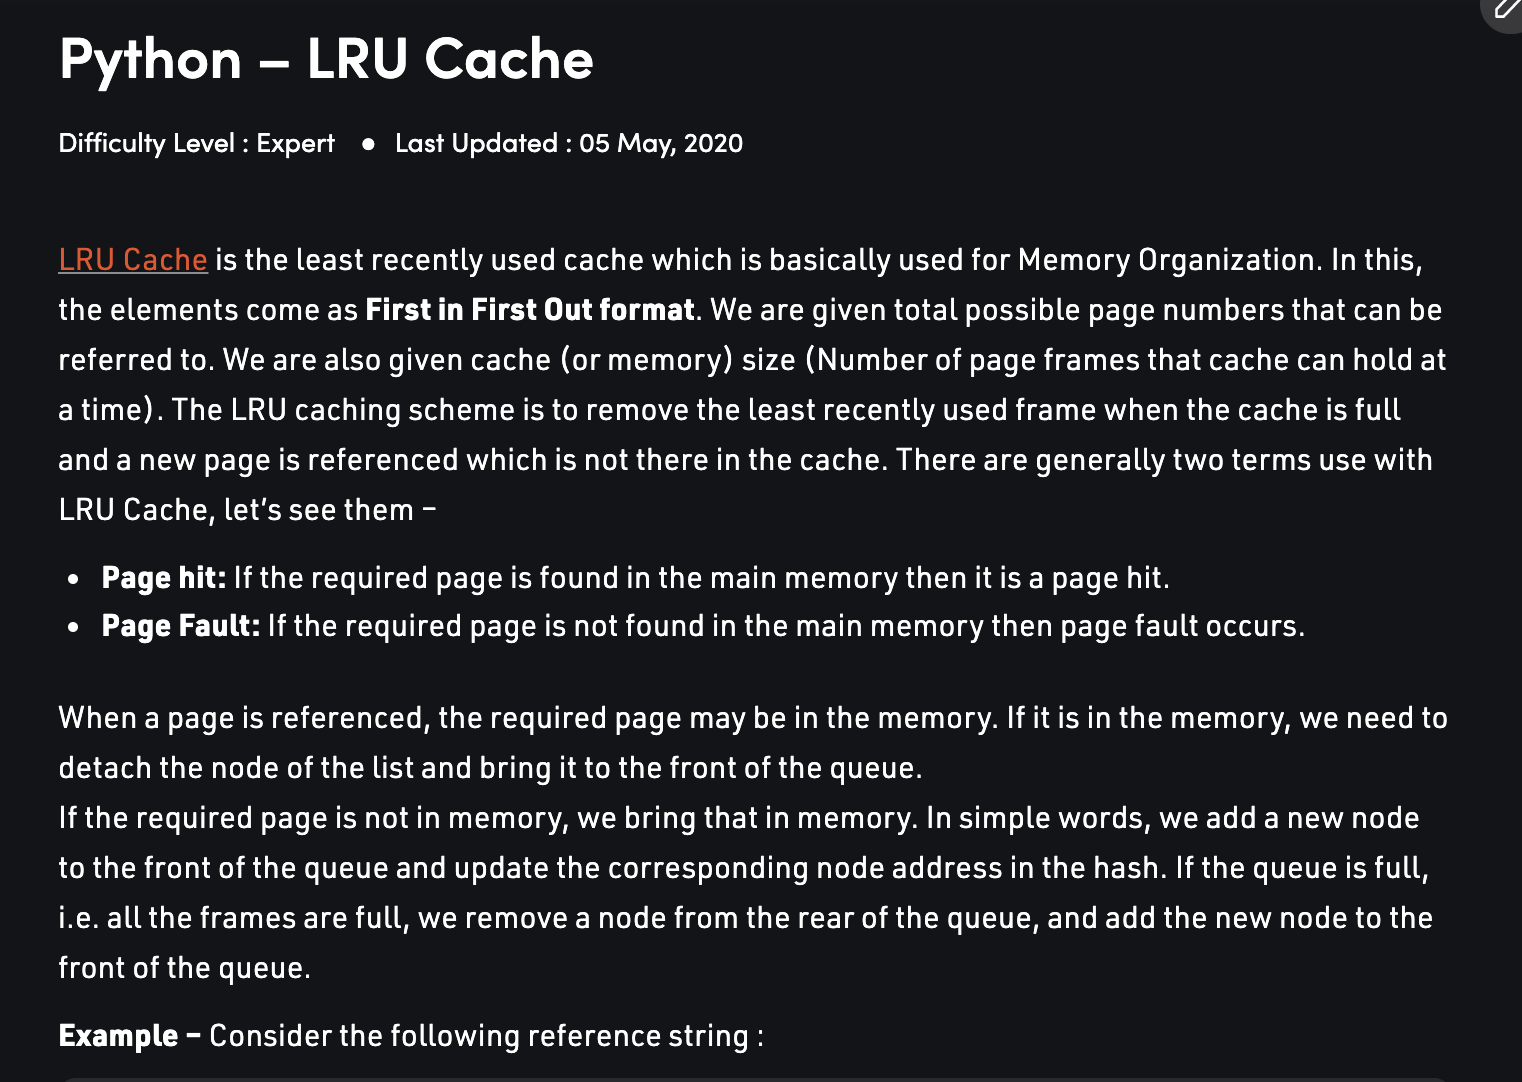

In [ ]:
class dllnode:
    def __init__(self,key,val):
        self.key = key
        self.val = val
        self.prev = None
        self.next = None

class doublylinkedlist:
    
    def __init__(self):
        self.head = None
        self.tail = None
        
    def inserttail(self,key,val):
        
        newNode = dllnode(key,val)
        
        if self.head == None:
            self.head = newNode
            self.tail = newNode
        else:
            self.tail.next = newNode
            newNode.prev = self.tail
            self.tail = self.tail.next
    
    
    def inserthead(self,key,val):
        
        newNode = dllnode(key,val)
        
        if self.head == None:
            self.head, self.tail = newNode,newNode
        else:
            self.head.prev = newNode
            self.head.prev.next = self.head
            self.head = self.head.prev
    
    def removetail(self):
        
        if self.head == None:
            return

        self.tail = self.tail.prev
        
        if self.tail != None:
            self.tail.next.prev = None
            self.tail.next = None
        else:
            self.head = None
    
    def movenodetohead(self,dllnode):
        
        if self.head == dllnode:
            return
        
        prevNode = dllnode.prev
        nextNode = dllnode.next
        
        prevNode.next = nextNode
        if nextNode != None:
            nextNode.prev = prevNode
        else:
            self.tail = self.tail.prev
        
        self.head.prev = dllnode
        dllnode.next = self.head
        dllnode.prev = None
        self.head = dllnode
        
    def printll(self):
        temp = self.head
        while temp != None:
            print(f"(key:{temp.key} & val:{temp.val})",end = ' --> ' )
            temp = temp.next
    
    def printllrev(self):
        temp = self.tail
        while temp != None:
            print(f"(key:{temp.key} & val:{temp.val})",end = ' --> ' )
            temp = temp.prev

In [151]:
dll = doublylinkedlist()

In [152]:
dll.inserttail(1,2)
dll.inserttail(2,4)
dll.inserttail(3,6)
dll.inserttail(4,8)

dll.inserthead(5,10)

In [153]:
dll.printll()
print("\n")
dll.printllrev()

(key:5 & val:10) --> (key:1 & val:2) --> (key:2 & val:4) --> (key:3 & val:6) --> (key:4 & val:8) --> 

(key:4 & val:8) --> (key:3 & val:6) --> (key:2 & val:4) --> (key:1 & val:2) --> (key:5 & val:10) --> 

In [166]:
class LRUCache:
    
    def __init__(self,maxsize):
        self.cache = {}
        self.maxsize = maxsize or 1
        self.currentsize = 0
        self.listofnodes = doublylinkedlist()
    
    def insertkeyvaluepair(self,key,value):
        
        if self.currentsize == self.maxsize:
            keytoberemoved = self.listofnodes.tail.key
            print("keytoberemoved : ",keytoberemoved)
            self.listofnodes.removetail()
            del self.cache[keytoberemoved]
        else:
            self.currentsize += 1
        #add the newNode in the cache and add it in the list of nodes
        self.listofnodes.inserthead(key,value)
        nodeadded = self.listofnodes.head
        self.cache[key] = nodeadded
    
    def updatekeyvaluepair(self,key,newval):
        
        if key not in self.cache:
            raise Exception("key does not exist")
        
        self.cache[key].val = newval
        self.listofnodes.movenodetohead(self.cache[key])
    
    def getvaluefromkey(self,key):
        
        if key not in self.cache:
            print('The key is not in the LRU Cache')
        else:
            return self.cache[key].val
        
    def getmostrecentkey(self):
        return self.listofnodes.head.key
        
    def printLRUCache(self):
        print("The List of Nodes : ")
        self.listofnodes.printll()
        
        print('\n')
        print("The Keys in the Cache : ")
        for x in self.cache.items():
            print(x[0])

In [168]:
mycache = LRUCache(3)
mycache.printLRUCache()

The List of Nodes : 


The Keys in the Cache : 


In [169]:
mycache.insertkeyvaluepair('a',1)
mycache.printLRUCache()

The List of Nodes : 
(key:a & val:1) --> 

The Keys in the Cache : 
a


In [170]:
mycache.insertkeyvaluepair('b',2)
mycache.printLRUCache()

The List of Nodes : 
(key:b & val:2) --> (key:a & val:1) --> 

The Keys in the Cache : 
a
b


In [171]:
mycache.insertkeyvaluepair('c',3)
mycache.printLRUCache()

The List of Nodes : 
(key:c & val:3) --> (key:b & val:2) --> (key:a & val:1) --> 

The Keys in the Cache : 
a
b
c


In [172]:
mycache.insertkeyvaluepair('d',4)
mycache.printLRUCache()

keytoberemoved :  a
The List of Nodes : 
(key:d & val:4) --> (key:c & val:3) --> (key:b & val:2) --> 

The Keys in the Cache : 
b
c
d


In [173]:
mycache.insertkeyvaluepair('X',4)
mycache.printLRUCache()

keytoberemoved :  b
The List of Nodes : 
(key:X & val:4) --> (key:d & val:4) --> (key:c & val:3) --> 

The Keys in the Cache : 
c
d
X


In [174]:
mycache.insertkeyvaluepair('XX',4)
mycache.printLRUCache()

keytoberemoved :  c
The List of Nodes : 
(key:XX & val:4) --> (key:X & val:4) --> (key:d & val:4) --> 

The Keys in the Cache : 
d
X
XX


In [175]:
mycache.insertkeyvaluepair('XXX',4)
mycache.printLRUCache()

keytoberemoved :  d
The List of Nodes : 
(key:XXX & val:4) --> (key:XX & val:4) --> (key:X & val:4) --> 

The Keys in the Cache : 
X
XX
XXX


In [177]:
mycache.updatekeyvaluepair('X',20)
mycache.printLRUCache()

The List of Nodes : 
(key:X & val:20) --> (key:XXX & val:4) --> (key:XX & val:4) --> 

The Keys in the Cache : 
X
XX
XXX


In [178]:
mycache.insertkeyvaluepair('XXXX',19)
mycache.printLRUCache()

keytoberemoved :  XX
The List of Nodes : 
(key:XXXX & val:19) --> (key:X & val:20) --> (key:XXX & val:4) --> 

The Keys in the Cache : 
X
XXX
XXXX


In [179]:
mycache.updatekeyvaluepair('X',21)
mycache.printLRUCache()

The List of Nodes : 
(key:X & val:21) --> (key:XXXX & val:19) --> (key:XXX & val:4) --> 

The Keys in the Cache : 
X
XXX
XXXX


In [185]:
print(mycache.getvaluefromkey('X'))
print(mycache.getmostrecentkey())

21
X


### LeetCode 

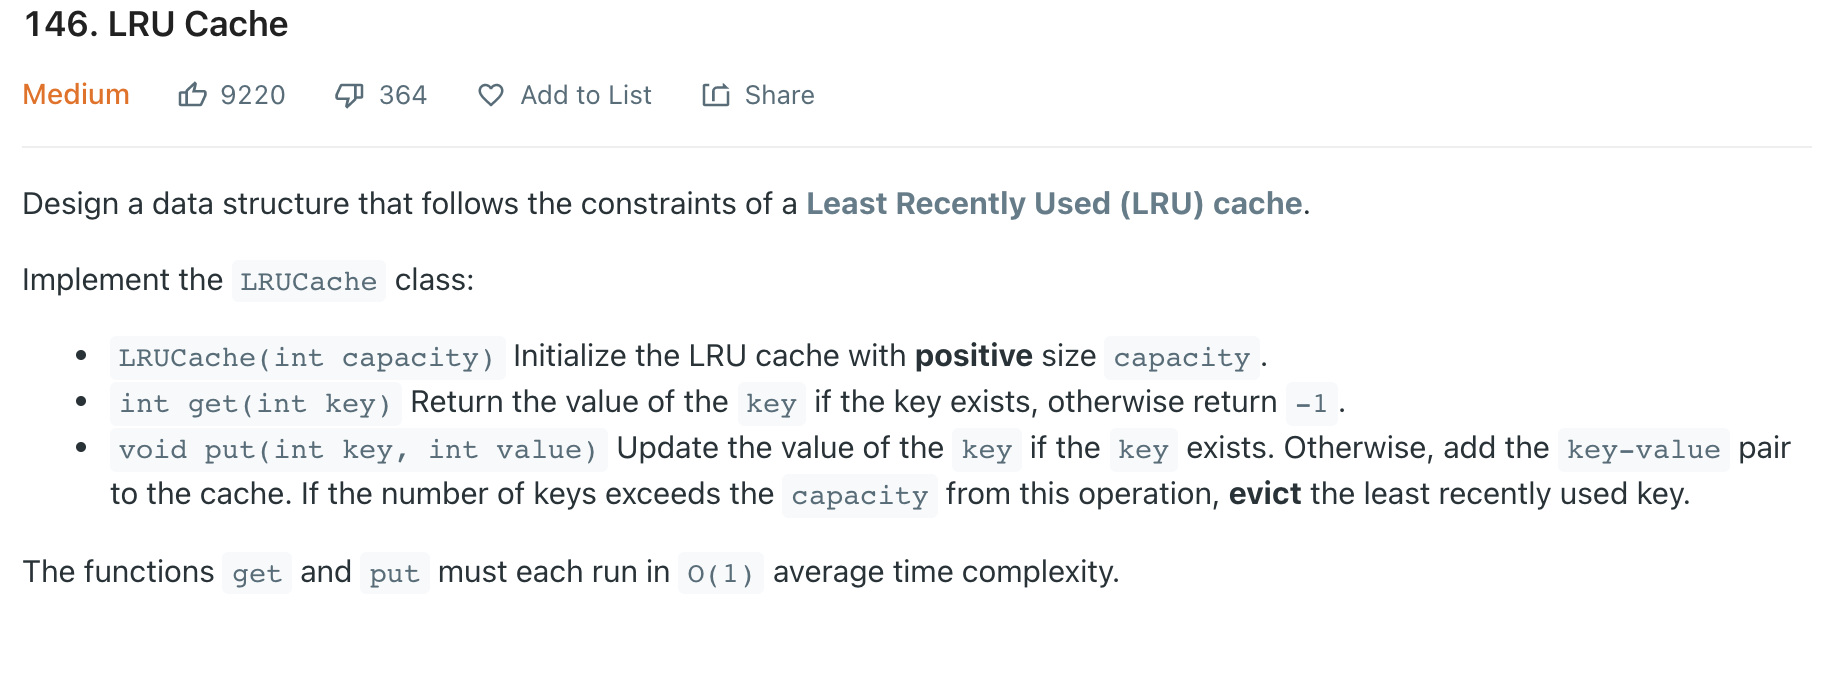

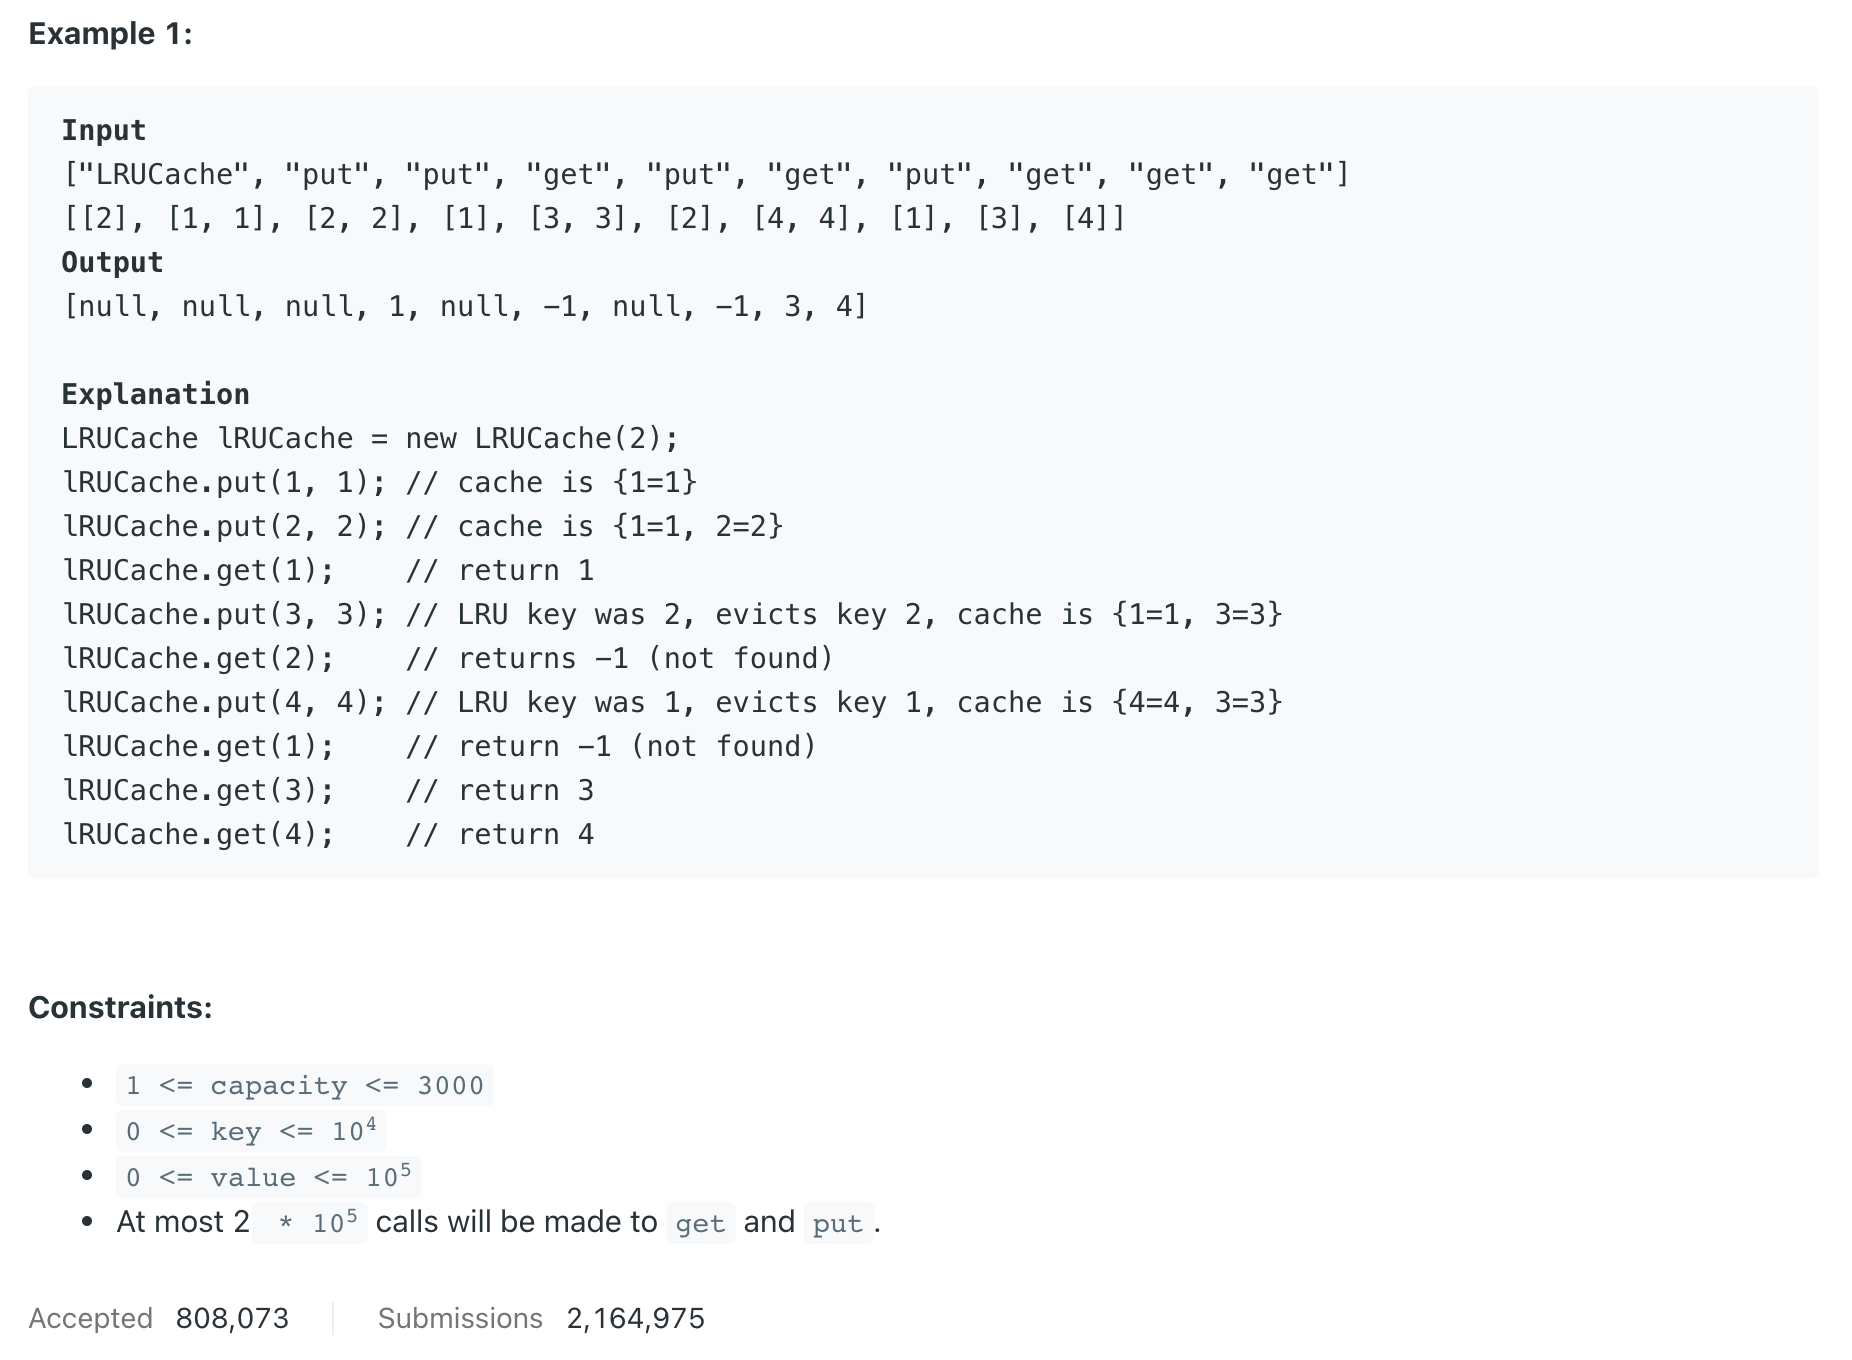

In [ ]:
from collections import OrderedDict

class LRUCache:

    def __init__(self, capacity: int):
        self.capacity = capacity
        self.cache = OrderedDict()

    def get(self, key: int) -> int:
        if key in self.cache:
            self.cache.move_to_end(key)
        return self.cache.get(key,-1)
        

    def put(self, key: int, value: int) -> None:
        self.cache[key] = value
        self.cache.move_to_end(key)
        if len(self.cache) > self.capacity:
            self.cache.popitem(last=False)
            

# Your LRUCache object will be instantiated and called as such:
# obj = LRUCache(capacity)
# param_1 = obj.get(key)
# obj.put(key,value)

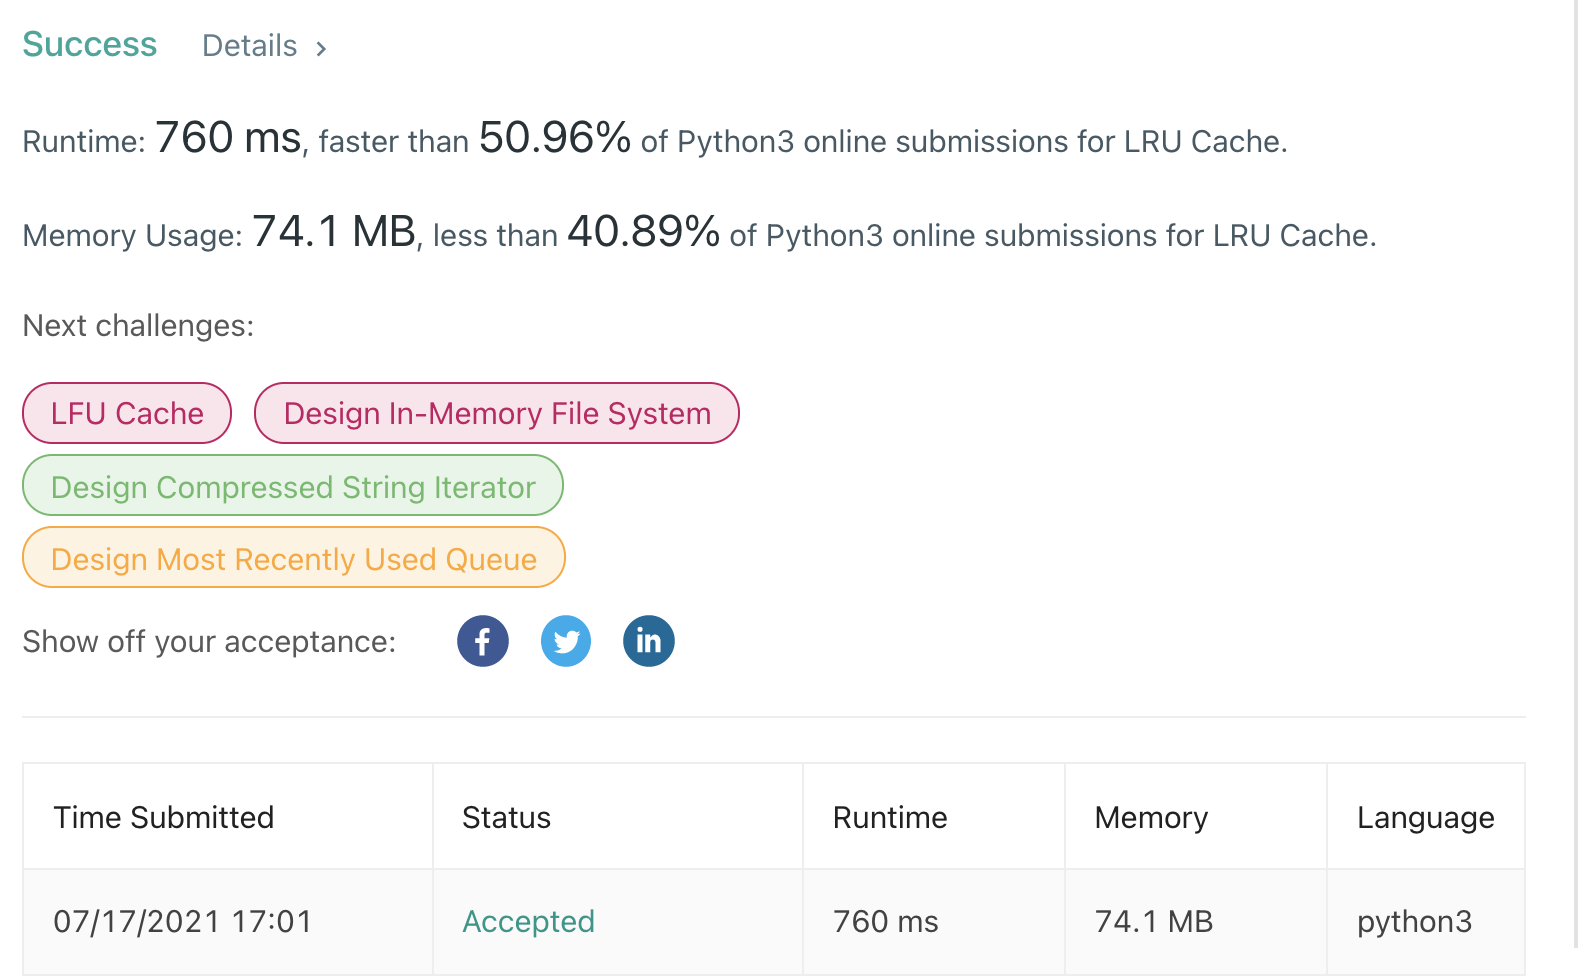